In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/CSCI 436 BIOGAS PROJECT/
!ls

/content/drive/My Drive/CSCI 436 BIOGAS PROJECT
caiso_2021-22.csv		  CaliTempV1.ipynb	    CSCI_436_PROJECT_REPORT.gdoc
CaliData_LinearRegression.ipynb   CaliTempV2.ipynb	    DecisionTreeRegression.ipynb
Cali-GAS-MVF-10-Year-Report.xlsx  Clustering.ipynb	    LinearRegression.ipynb
CaliRenewProd2010-18.csv	  CSCI_436_PROJECT.gslides


In [4]:
df2 = pd.read_csv('/content/drive/My Drive/CSCI 436 BIOGAS PROJECT/caiso_2021-22.csv')
df1 = pd.read_csv('/content/drive/My Drive/CSCI 436 BIOGAS PROJECT/CaliRenewProd2010-18.csv')


In [5]:
df1['TIMESTAMP'] = pd.to_datetime(df1['TIMESTAMP'])
df2['DateTime'] = pd.to_datetime(df2['DateTime'])

In [6]:
df1['Unified_Timestamp'] = df1['TIMESTAMP']
df2['Unified_Timestamp'] = df2['DateTime']

In [7]:
df2.rename(columns={'Biogas': 'BIOGAS', 'Biomass': 'BIOMASS'}, inplace=True)


In [8]:
df = pd.concat([df1, df2])

In [9]:
df['BIOGAS'].fillna(df['BIOGAS'].mean(), inplace=True)
df['BIOMASS'].fillna(df['BIOMASS'].mean(), inplace=True)
df2['Natural Gas'].fillna(df2['Natural Gas'].mean(), inplace=True)

In [10]:
X = df[['Unified_Timestamp']].apply(lambda x: mdates.date2num(x))
X2 = df2[['Unified_Timestamp']].apply(lambda x: mdates.date2num(x))
y_biogas = df['BIOGAS']  # target for biogas
y_biomass = df['BIOMASS']  # target for biomass
y_natural_gas = df2['Natural Gas']

In [11]:
X_train, X_test, y_train_biogas, y_test_biogas = train_test_split(X, y_biogas, test_size=0.2, random_state=42)
_, _, y_train_biomass, y_test_biomass = train_test_split(X, y_biomass, test_size=0.2, random_state=42)
X2_train, X2_test, y_train_natural_gas, y_test_natural_gas = train_test_split(X2, y_natural_gas, test_size=0.2, random_state=42)

In [12]:
model_biogas = LinearRegression()


In [13]:
model_biogas.fit(X_train, y_train_biogas)

LinearRegression()

In [14]:
y_pred_biogas = model_biogas.predict(X_test)

In [15]:
# Calculate the mean squared error of the predictions for biogas
mse_biogas = mean_squared_error(y_test_biogas, y_pred_biogas)

In [16]:
print(f"Mean Squared Error for Biogas: {mse_biogas}")

Mean Squared Error for Biogas: 302.7556122209792


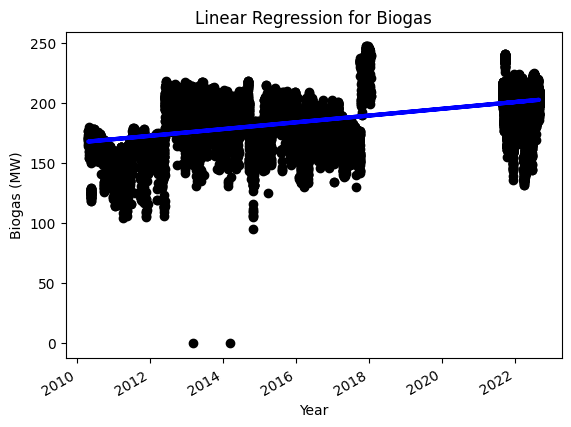

In [17]:
plt.scatter(mdates.num2date(X_test['Unified_Timestamp']), y_test_biogas, color='black')
plt.plot(mdates.num2date(X_test['Unified_Timestamp']), y_pred_biogas, color='blue', linewidth=3)
plt.title('Linear Regression for Biogas')
plt.xlabel('Year')
plt.ylabel('Biogas (MW)')
plt.gcf().autofmt_xdate()
plt.show()

In [18]:
model_biomass = LinearRegression()

In [19]:
model_biomass.fit(X_train, y_train_biomass)

LinearRegression()

In [20]:
y_pred_biomass = model_biomass.predict(X_test)

In [21]:
mse_biomass = mean_squared_error(y_test_biomass, y_pred_biomass)

In [22]:
print(f"Mean squared error: {mse_biomass}")


Mean squared error: 2708.056492179717


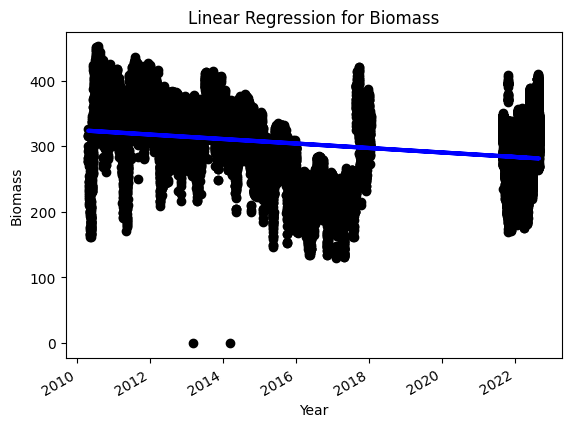

In [23]:
plt.scatter(mdates.num2date(X_test['Unified_Timestamp']), y_test_biomass, color='black')
plt.plot(mdates.num2date(X_test['Unified_Timestamp']), y_pred_biomass, color='blue', linewidth=3)
plt.title('Linear Regression for Biomass')
plt.xlabel('Year')
plt.ylabel('Biomass')
plt.gcf().autofmt_xdate()
plt.show()

In [24]:
'''
Regression provides that as biogas is increasing over time,
biomass is descreasing. Could be related or other unknown factors.
'''


'\nRegression provides that as biogas is increasing over time,\nbiomass is descreasing. Could be related or other unknown factors.\n'

In [25]:
model_natural_gas = LinearRegression()

In [26]:
model_natural_gas.fit(X2_train, y_train_natural_gas)

LinearRegression()

In [27]:
y_pred_natural_gas = model_natural_gas.predict(X2_test)

In [28]:
mse_natural_gas = mean_squared_error(y_test_natural_gas, y_pred_natural_gas)

In [29]:
print(f"Mean Squared Error for Natural Gas: {mse_natural_gas}")

Mean Squared Error for Natural Gas: 14859621.303722616


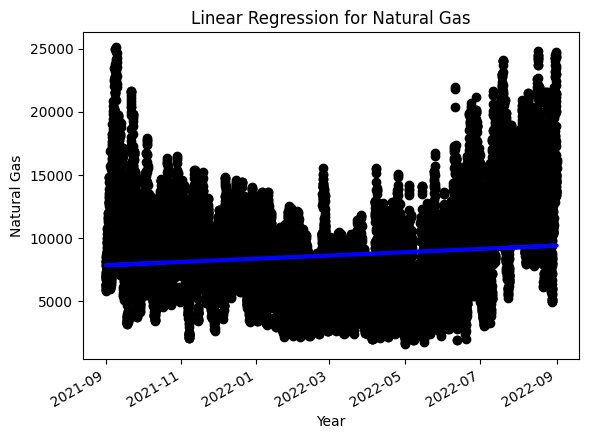

In [30]:
plt.scatter(mdates.num2date(X2_test['Unified_Timestamp']), y_test_natural_gas, color='black')
plt.plot(mdates.num2date(X2_test['Unified_Timestamp']), y_pred_natural_gas, color='blue', linewidth=3)
plt.title('Linear Regression for Natural Gas')
plt.xlabel('Year')
plt.ylabel('Natural Gas')
plt.gcf().autofmt_xdate()
plt.show()